## Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

-  Γκαμουλάκος Παρασκευάς:

-  Καρυπιάδης Ευστράτιος: _03114911_

-  Μήτρο Νικόλαος:

In [1]:
import warnings
warnings.filterwarnings('ignore')

---

## Εισαγωγή του Dataset

Το dataset μας προκύπτει έπειτα απο την εφαρμογή του συστήματος _HIPS (Hierarchical Image Processing System)_ σε σειρά εικονών, οι οποίες ελήφθησαν για τεσσερις διαφορετικές κατηγορίες οχημάτων κάτω από τις ίδιες συνθήκες φωτισμού και γωνίας λήψης. Τα χαρακτηριστικά που εξήχθησαν αντιστοιχούν σε μετρικές ψηφιακής περιγραφής των εικόνων και αποτελούν τις στήλες των δεδομένων μας. Εκμεταλλευόμενοι τα παραπάνω χαρακτηριστικά θα επιχειρήσουμε να ταξινομήσουμε τα δείγματα που έχουμε στην διάθεσή μας στην αντίστοιχη κατηγορία οχήματος που ανήκουν.

Τα αρχεία δεδομένων μας είναι χωρισμένα σε εννέα διαφορετικά αρχεία τα οποία θα ομαδοποιήσουμε σε έναν πίνακα. Αυτό επιτυγχάνεται με το σειριακό διάβασμα των αρχείων και την τελική ενοποίηση όλων των δεδομένων σε ένα Dataframe. Δεν υπάρχει αρίθμηση για κάθε διαφορετικό δείγμα-γραμμή, αλλά ούτε ονομασία για τα χαρακτηριστικά-στήλες μας. Για αυτό το λόγο επιλέγουμε να ονοματίσουμε της στήλες των δεδομένων μας, συμβουλεύομενοι την περιγραφή του dataset.

In [2]:
import glob
import pandas as pd

path = 'data'
all_data = glob.glob(path + '/*.dat')

l = []

column_names = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio',
                'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 
                'max.length_rectangularity', 'major.axis_scaled_variance', 'minor.axis_scaled_variance',
                'gyration_scaled_radius', 'major.axis skewness', 'minor.axis_skewness', 'minor.axis_kurtosis',
                'major.axis_curtosis', 'hollows_ratio', 'label']

for filename in all_data:
    df = pd.read_csv(filename, header=None, sep=' ', names = column_names, usecols= [num for num in range(19)])
    l.append(df)
    
cars = pd.concat(l, axis=0, ignore_index=True)
cars.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio,label
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας:

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                   846 non-null int64
circularity                   846 non-null int64
distance_circularity          846 non-null int64
radius_ratio                  846 non-null int64
pr.axis_aspect_ratio          846 non-null int64
max.length_aspect_ratio       846 non-null int64
scatter_ratio                 846 non-null int64
elongatedness                 846 non-null int64
pr.axis_rectangularity        846 non-null int64
max.length_rectangularity     846 non-null int64
major.axis_scaled_variance    846 non-null int64
minor.axis_scaled_variance    846 non-null int64
gyration_scaled_radius        846 non-null int64
major.axis skewness           846 non-null int64
minor.axis_skewness           846 non-null int64
minor.axis_kurtosis           846 non-null int64
major.axis_curtosis           846 non-null int64
hollows_ratio                 846 non-null int64
label        

In [4]:
cars.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
cars.shape

(846, 19)

Παρατηρούμε ότι έχουμε στη διάθεσή μας 846 δείγματα, καθένα από τα οποία συνοδεύεται από 18 συνολικά χαρακτηριστικά. Κατά συνέπεια ο πίνακας των δεδομένων μας αποτελείται από 19 στήλες, δεδομένου ότι η τελευταία αντιστοιχεί στις ετικέτες των κατηγοριών. Τα χαρακτηριστικά αυτά είναι αριθμοί, ενώ δεν υπάρχει στήλη στην οποία να απουσιάζουν τιμές. Σημειώνουμε ότι η στήλη των ετικετών περιέχει τιμές σε μορφή κειμένου, τις οποίες όμως δε χρειάζεται να κωδικοποιήσουμε σε αριθμούς, εφόσον είναι διαφορετικές μεταξύ τους.

In [6]:
cars['label'].value_counts(normalize=True) * 100

bus     25.768322
saab    25.650118
opel    25.059102
van     23.522459
Name: label, dtype: float64

Οι κατηγορίες των οχημάτων μας είναι 4 και φέρουν τα ονόματα: _Bus, Van, Opel_ και _Saab_. Έχουμε ισορροπία στο σύνολο των δεδομένων, αφού όπως υπολογίζουμε κάθε κατηγορία συναστά περίπου το 1/4 του Dataset.

---

## Διαχωρισμός Δεδομένων Εκπαίδευσης & Ελέγχου

Αν και οι κατηγορίες μας είναι ισορροπημένες στο σύνολο των δεδομένων μας, για το διαχωρισμό αυτών θα χρησιμοποιήσουμε τη _StratifiedShuffleSplit_ ώστε να εξασφαλίσουμε ότι τα δεδομένα εκπαίδευσης θα αποτελούνται από αντιπροσωπευτικό πλήθος κατηγοριών με το ολικό Dataset:

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(cars, cars['label']):
    train_set = cars.reindex(train_index)
    test_set = cars.reindex(test_index)
    
train_set['label'].value_counts() / len(train_set) * 100

bus     25.739645
saab    25.591716
opel    25.147929
van     23.520710
Name: label, dtype: float64

Τέλος, θα διαχωρίσουμε τα χαρακτηριστικά των δεδομένων μας από την κατηγορία στην οποία ανήκουν:

In [8]:
# Training Set
cars_train = train_set.drop('label', axis=1)
cars_train_labels = train_set['label'].copy()

# Test Set
cars_test = test_set.drop('label', axis=1)
cars_test_labels = test_set['label'].copy()

---

## Baseline Classification

#### 1. DummyClassifier

Αρχικά θα εκπαιδεύσουμε έναν _DummyClassifier_ χωρίς να μεταβάλλουμε τις παραμέτρους αρχικοποίησής του:

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(cars_train, cars_train_labels) # fitting on train_set

cars_predictions = dc_default.predict(cars_test) # predicting on test_set

target_names = dc_default.classes_.tolist() # fetch class names

dummy_default = accuracy_score(cars_test_labels, cars_predictions) * 100

In [11]:
dummy_default

27.647058823529413

Παρατηρούμε ότι η ακρίβεια του _DummyClassifier_ είναι αρκετά χαμηλή, με ποσοστό περίπου 21%.

Συνεχίζοντας, θα πάρουμε περισσότερες πληροφόριες για τη διαδικασία ταξινόμησης, υπολογίζοντας _Confusion Table_ καθώς και τις τιμές _Precision, Recall_ και _F1-Score_ :

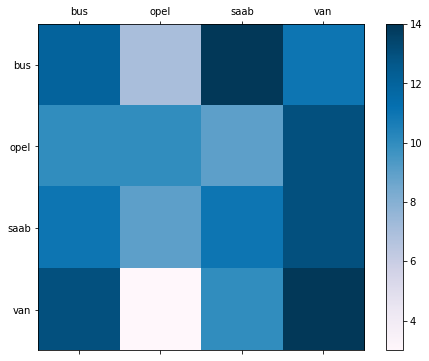

In [13]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(cars_test_labels, cars_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [14]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

dc_f1_micro = f1_score(cars_test_labels, cars_predictions, average='micro')
dc_f1_macro = f1_score(cars_test_labels, cars_predictions, average='macro')

print("F1-Micro Average: " + str(dc_f1_micro))
print("F1-Macro Average: " + str(dc_f1_macro) + "\n")

print(classification_report(cars_test_labels, cars_predictions))

F1-Micro Average: 0.27647058823529413
F1-Macro Average: 0.27651227880101115

              precision    recall  f1-score   support

         bus       0.26      0.27      0.27        44
        opel       0.34      0.24      0.28        42
        saab       0.25      0.25      0.25        44
         van       0.27      0.35      0.31        40

    accuracy                           0.28       170
   macro avg       0.28      0.28      0.28       170
weighted avg       0.28      0.28      0.28       170



Μελετώντας τον πίνακα σύγχυσης διασταυρώνουμε το ποσοστό επιτυχίας που σημειώσαμε παραπάνω, παρατηρώντας πως η κύρια διαγώνιος 
δεν παρουσιάζει εμφανώς έντονες τιμές. Σχετικά με τα _F1-Macro_ και _F1-Micro_ αναμένουμε να έχουν σχεδόν ίδιες τιμές, επειδή το πλήθος των δεδομένων μας ήταν ισορροπημένο ως προς τις κατηγορίες οχημάτων και κατά συνέπεια δε δημιουργείται κάποια κλίση ως προς την περισσότερη ή λιγότερη συχνή κατήγορια. 

Σχετικά με τις τιμές ακρίβειας και ανάκλισης, παρατηρούμε ότι η κατηγορία _Saab_ εμφανίζει τις υψηλότερες τιμές. Πιο συγκεκριμένα, εάν το σύστημα μας προβλέψει πως κάποιο δείγμα είναι αυτοκίνητο της συγκεκριμένης κατηγορίας είναι σωστό με ποσοστό 31%, ενώ από τις συνολικές φωτογραφίες του δεδομένου αυτοκινήτου, μπορεί να αναγνωρίσει μόλις το 36% αυτών. Τα παραπάνω αποτελέσματα δεν συνάδουν με τη διαισθητική, αρχική μας πρόβλεψη, καθώς αναμέναμε τις κατηγορίες _Bus_ και _Van_ να εμφανίζουν τις υψηλότερες αποδόσεις. Αυτό οφείλεται στο γεγονός ότι οι δύο αυτές κατηγορίες οχημάτων είναι οι περισσότερο προφανής προς ταξινόμηση, λόγω των χαρακτηριστικών διαφορών που παρουσιάζουν στο μέγεθος και στο σχήμα τους, σε σύγκριση με τα παραδοσιακά αμάξια των υπολοίπων δύο κατηγοριών. Αποδίδουμε αυτό το αποτέλεσμα στην τυχαιότητα προβλέψεων του _DummyClassifier_ και αναμένουμε να διασταυρώσουμε την εκτίμηση μας με επόμενους ταξινομητές.

#### 2. KNeighborsClassifier

Θα συνεχίσουμε με την εκπαίδευση ενός προεπιλεγμένου _KNeighborsClassifier_ :

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(cars_train, cars_train_labels) # fitting on train_set

cars_predictions = knn.predict(cars_test) # predicting on test_set

target_names = knn.classes_.tolist() # fetch class names

knn_default = accuracy_score(cars_test_labels, cars_predictions) * 100

In [17]:
knn_default

67.05882352941175

Η ακρίβεια σε αυτήν την περίπτωση είναι αισθητά υψηλότερη από προηγουμένως. Ας εξετάσουμε τις ανάλογες μετρικές απόδοσης:

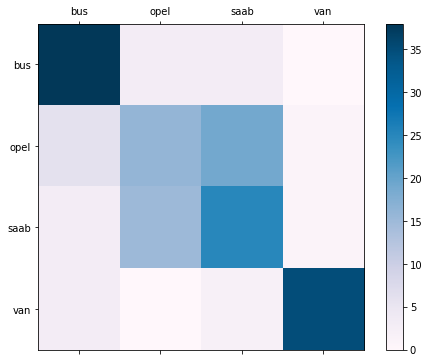

In [18]:
matrix = confusion_matrix(cars_test_labels, cars_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [19]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [20]:
kn_f1_micro = f1_score(cars_test_labels, cars_predictions, average='micro')
kn_f1_macro = f1_score(cars_test_labels, cars_predictions, average='macro')

print("F1-Micro Average: " + str(kn_f1_micro))
print("F1-Macro Average: " + str(kn_f1_macro) + "\n")

print(classification_report(cars_test_labels, cars_predictions))

F1-Micro Average: 0.6705882352941176
F1-Macro Average: 0.6690721468924699

              precision    recall  f1-score   support

         bus       0.76      0.86      0.81        44
        opel       0.47      0.38      0.42        42
        saab       0.51      0.57      0.54        44
         van       0.95      0.88      0.91        40

    accuracy                           0.67       170
   macro avg       0.67      0.67      0.67       170
weighted avg       0.67      0.67      0.67       170



Ο πίνακας σύγχυσης για το δεδομένο ταξινομητή παρατηρούμε ότι είναι περισσότερο διαγωνιοποιημένος, με υψηλά ποσοστά ακρίβειας για τις κατηγορίες _Bus_ και _Van_ , όπως αναμέναμε. Ανάλογη αύξηση σημειώνουμε και στις τιμές του F1-score, με παραπλήσιες τιμές για Macro και Micro Average.

Τέλος σημειώνουμε ότι αν και ο ταξινομητής παρουσιάζει βελτιωμένη απόδοση με προηγουμένως, αντιμετωπίζει δυσκολία στο διαχωρισμό των δύο παραδοσιακών αυτοκινήτων _Opel_ και _Saab_ , αφού παρατηρώντας την ανάκλιση των συγκεκριμένων κατηγοριών, διαπιστώνουμε ότι μπορεί να αναγνωρίσει μονάχα το 48% και 39% αυτών, αντίστοιχα.

Ολοκληρώντας την πρώτη μελέτη των δεδομένων μας με τους _Dummy_ και _KNeighbors_ ταξινομητές μας, παρουσιάζουμε παρακάτω ένα διάγραμμα συγκρίνοντας τις τιμές των βαθμολογιών F1 ξεχωριστά για κάθε ταξινομητή:

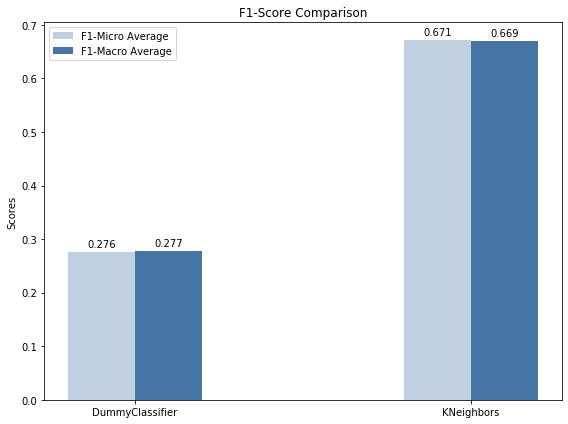

In [21]:
# Grouped BarPlot source: https://bit.ly/36y14Sw

labels = ['DummyClassifier', 'KNeighbors']
f1_micro = [round(dc_f1_micro, 3), round(kn_f1_micro, 3)]
f1_macro = [round(dc_f1_macro, 3), round(kn_f1_macro, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))
rect1 = ax.bar(x-width/2, f1_micro, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

---

## Βελτίωση Ταξινομητών

Προτού ξεκινήσουμε τη διαδικασία βελτιστοποίησης, θα υλοποιήσουμε τη συνάρτηση *Cross_Validation*, η οποία θα διαχωρίζει τα δεδομένα σε k μέρη και θα επιστρέφει σειριακά (k-1) ως train_set και (1) ως test_set. Σημειώνουμε ότι τα ορίσματα θα πρέπει να βρίσκονται σε μορφή NumPyArray, δεδομένου ότι θα έχουν περάσει ήδη από διαδικασία κανονικοποίησης. Θα χρησιμοποιήσουμε σχήμα διαχωρισμού δεδομένου 10-fold.

Τους ταξινομήτες μας θα τους εξετάσουμε με μία σειρά διαφορετικών ορισμάτων. Πιο συγκεκριμένα, στον *DummyClassifier* θα δοκιμάσουμε όλες τις δυνατές στρατηγικές εκπαίδευσης, ενώ στον *KNeighborsClassifier* θα δοκιμάσουμε τιμές γειτόνων στο διάστημα [1,30]. Για λόγους εξοικονόμησης χρόνου εκπαίδευσης και υπολογιστικής ισχύς, επιλέγουμε τους περιττούς όρους του διαστήματος.

In [22]:
def KFold_Dataframe(dataset, datalabels, i, k):
    """ Splits dataset and respective datalabels to k-folds, returns train and validation sets. """
    n = len(dataset)
    test = dataset[n*(i-1)//k:n*i//k]
    test_labels = datalabels[n*(i-1)//k:n*i//k]
    train = pd.concat([dataset[:n*(i-1)//k], dataset[n*i//k:]])
    train_labels = pd.concat([datalabels[:n*(i-1)//k], datalabels[n*i//k:]])
    
    return train, train_labels, test, test_labels

def KFold_NumpyArray(dataset, datalabels, i, k):
    """ Splits dataset and respective datalabels to k-folds, returns train and validation sets. """
    n = len(dataset)
    test = dataset[n*(i-1)//k:n*i//k]
    test_labels = datalabels[n*(i-1)//k:n*i//k]
    train = np.concatenate((dataset[:n*(i-1)//k], dataset[n*i//k:]), axis=0)
    train_labels = np.concatenate((datalabels[:n*(i-1)//k], datalabels[n*i//k:]), axis=0)
    
    return train, train_labels, test, test_labels

def Cross_Validation(cars_train_scaled, cars_train_labels, k):
    """ Yields dataset folds for cross validation. """
    for i in range(1, k+1):
        train, train_labels, test, test_labels = KFold_NumpyArray(cars_train_scaled, cars_train_labels.values, i, k)
        
        yield train, train_labels, test, test_labels
        
def KFold(dataset, k):
    """ Yields train and test indexes for a given dataset. """
    n = len(dataset)
    for i in range(1, k+1):
        curr_train_index = [num for num in list(range(0, n*(i-1)//k)) + list(range(n*i//k, n))]
        train_index = np.asarray(curr_train_index)
        curr_test_index = [num for num in range(n*(i-1)//k, n*i//k)]
        test_index = np.asarray(curr_test_index)
        
        yield train_index, test_index

### 1. Standardization

Σαν πρώτο βήμα προεπεξεργασίας θα δοκιμάσουμε μόνο την κανονικοποίηση των δεδομένων μας. Επιλέγουμε τον *StandardScaler*, προκειμένου το μοντέλο μας να είναι περισσότερο ανεκτικό σε outlier τιμές.

#### DummyClassifier - Scaled

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cars_train_scaled = std_scaler.fit_transform(cars_train) # fitting/transforming on train set
cars_test_scaled = std_scaler.transform(cars_test) # transforming on test set

In [24]:
result_dc = {}
strategies = ['stratified', 'most_frequent', 'prior', 'uniform']

for st in strategies:
    acc = []
    dc = DummyClassifier(strategy=st)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_scaled, cars_train_labels, 10):
        dc.fit(train, train_labels)
        pred = dc.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result_dc[(sum(acc)/len(acc))] = st
    
dummy_scaled = max(result_dc)

In [25]:
print("DummyClassifier_Default: " + str(dummy_default))
print("DummyClassifier_Scaled with " + str(result_dc[dummy_scaled]) + " strategy: " + str(dummy_scaled))

DummyClassifier_Default: 27.647058823529413
DummyClassifier_Scaled with stratified strategy: 23.823529411764707


#### KNeighborsClassifier - Scaled

In [26]:
result_knn = {}
neighbors = [i+1 for i in range(30)]

for el in neighbors:
    acc = []
    knn = KNeighborsClassifier(n_neighbors=el)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_scaled, cars_train_labels, 10):
        knn.fit(train, train_labels)
        pred = knn.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result_knn[sum(acc)/len(acc)] = el

knn_scaled = max(result_knn)

In [28]:
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn[knn_scaled])+ " neighbors: " + str(knn_scaled))

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236


### 2. Univariate Selection, Standardization

Στη συνέχεια θα επιλέξουμε πρώτα χαρακτηριστικά μέσω της *SelectKBest* και έπειτα θα κανονικοποιήσουμε τα δεδομένα μας. Ως συναρτήσεις εκτίμησης θα χρησιμοποιήσουμε τη *mutual_info_classif*.

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#### DummyClassifier - UniSelected, Scaled

In [88]:
acc = []
result_score_dnopca = 0
num_features = [i for i in range(1, 18)]

for feat in num_features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > result_score_dnopca:
            result_score_dnopca = sum(acc)/len(acc)
            final_dnopca = feat
            strategy_dnopca = st

In [89]:
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dc[dummy_scaled]) + " strategy: " + str(dummy_scaled))
print("UniSelected_Scaled with " + str(strategy_dnopca) + " strategy and " + str(final_dnopca) + " features: " + str(result_score_dnopca))

Default: 27.647058823529413
Scaled with stratified strategy: 23.823529411764707
UniSelected_Scaled with stratified strategy and 2 features: 28.41308165057068


#### KNeighbors - UniSelected, Scaled

In [84]:
acc = []
result_score_nopca = 0

for feat in num_features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > result_score_nopca:
            result_score_nopca = sum(acc)/len(acc)
            final_nopca = feat
            num_neighbors_nopca = el

In [85]:
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn[knn_scaled])+ " neighbors: " + str(knn_scaled))
print("UniSelected_Scaled with " + str(num_neighbors_nopca)+ " neighbors and " + str(final_nopca) + " features: " + str(result_score_nopca))

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236
UniSelected_Scaled with 3 neighbors and 12 features: 73.38235294117648


### 3. Univariate Selection, Standardization, PCA

Συνεχίζουμε την παραπάνω διαδικασία με τη μείωση της διαστατικότητας των δεδομένων μας. Αρχικά θα δοκιμάσουμε την *PCA*, με όρισμα τον πραγματικό αριθμό 0.95 που αντιστοιχεί στο ελάχιστο ποσοστό διακύμανσης που θα πρέπει να διατηρούν τα χαρακτηριστικά μας, ούτως ώστε να μην αφαιρεθούν από το σύνολο.

#### DummyClassifier - UniSelected, Scaled, PCA

In [90]:
acc = []
result_score = 0
pca = PCA(n_components=0.95)

for feat in num_features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > result_score:
            result_score = sum(acc)/len(acc)
            final = feat
            strategy = st

In [91]:
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dc[dummy_scaled]) + " strategy: " + str(dummy_scaled))
print("UniSelected_Scaled with " + str(strategy_dnopca) + " strategy and " + str(final_dnopca) + " features: " + str(result_score_dnopca))
print("UniSelected_Scaled_PCA with " + str(strategy) + " strategy and " + str(final) + " features: " + str(result_score))

Default: 27.647058823529413
Scaled with stratified strategy: 23.823529411764707
UniSelected_Scaled with stratified strategy and 2 features: 28.41308165057068
UniSelected_Scaled_PCA with uniform strategy and 2 features: 28.077260755048293


#### KNeighborsClassifier - UniSelected, Scaled, PCA

In [86]:
from sklearn.decomposition import PCA

acc = []
result_score = 0
pca = PCA(n_components=0.95)

for feat in num_features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > result_score:
            result_score = sum(acc)/len(acc)
            final = feat
            num_neighbors = el

In [87]:
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn[knn_scaled])+ " neighbors: " + str(knn_scaled))
print("UniSelected_Scaled with " + str(num_neighbors_nopca)+ " neighbors and " + str(final_nopca) + " features: " + str(result_score_nopca))
print("UniSelected_Scaled_PCA with " + str(num_neighbors)+ " neighbors and " + str(final) + " features: " + str(result_score))

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236
UniSelected_Scaled with 3 neighbors and 12 features: 73.38235294117648
UniSelected_Scaled_PCA with 6 neighbors and 9 features: 68.80377524143987


### 4. Univariate Selection, Standardization, ICA

#### DummyClassifier - UniSelected, Scaled, ICA

In [92]:
from sklearn.decomposition import FastICA

components = [i for i in range(1, 18)]

for comp in components:
    ica = FastICA(n_components=comp)
    for feat in num_features:
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
        cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_pca = ica.fit_transform(cars_train_selected_scaled)
        for st in strategies:
            acc = []
            dc = DummyClassifier(strategy=st)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                dc.fit(train, train_labels)
                pred = dc.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > result_score:
                result_score = sum(acc)/len(acc)
                final = feat
                strategy = st
                comps = comp

In [93]:
print("UniSelected_Scaled_ICA with " + str(num_neighbors)+ " neighbors and " + str(final) + " features: " + str(result_score))

UniSelected_Scaled_ICA with 6 neighbors and 8 features: 29.59613696224759


#### KNeighborsClassifier - UniSelected, Scaled, ICA

In [94]:
acc = []
final = 0
result_score = 0

for comp in components:
    ica = FastICA(n_components=comp)
    for feat in num_features:
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
        cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_ica = ica.fit_transform(cars_train_selected_scaled)
        for el in neighbors:
            acc = []
            knn = KNeighborsClassifier(n_neighbors=el)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                knn.fit(train, train_labels)
                pred = knn.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > result_score:
                result_score = sum(acc)/len(acc)
                final = feat
                num_neighbors = el
                comps = comp

In [95]:
print("UniSelected_Scaled_ICA with " + str(num_neighbors)+ " neighbors and " + str(final) + " features: " + str(result_score))

UniSelected_Scaled_ICA with 5 neighbors and 16 features: 80.63652326602283


### 5. Recursive Feature Elimination, Standardization

In [ ]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=12, step=10, verbose=0)
rfe_selector.fit(cars_train, cars_train_labels)

cars_train_rfe = rfe_selector.transform(cars_train)
cars_train_rfe = std_scaler.fit_transform(cars_train_rfe)

#### DummyClassifier - RFE, Scaled

In [ ]:
result = []

for st in strategies:
    acc = []
    dc = DummyClassifier(strategy=st)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_rfe, cars_train_labels, 10):
        dc.fit(train, train_labels)
        pred = dc.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result.append(sum(acc)/len(acc))
    
dummy_RFEselected_scaled = max(result)

#### KNeighbors - RFE, Scaled

In [ ]:
result = []

for el in neighbors:
    acc = []
    knn = KNeighborsClassifier(n_neighbors=el)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_rfe, cars_train_labels, 10):
        knn.fit(train, train_labels)
        pred = knn.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result.append(sum(acc)/len(acc))

knn_RFEselected_scaled = max(result)

In [ ]:
result = []

for el in neighbors:
    acc = []
    knn = KNeighborsClassifier(n_neighbors=el)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_rfe_ica, cars_train_labels, 10):
        knn.fit(train, train_labels)
        pred = knn.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result.append(sum(acc)/len(acc))

knn_RFEselected_scaled_ica = max(result)

### 6. Recursive Feature Elimination, Standardization, ICA